In [ ]:
!pip install librosa tensorflow sklearn
 # This might be needed to handle audio processing in Colab


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
!pip install scikit-learn


In [ ]:
!ffmpeg -version

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enable-l

In [ ]:
!pip install librosa tensorflow

In [ ]:
!pip install -q kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 398, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
!kaggle datasets download -d hbchaitanyabharadwaj/audio-dataset-with-10-indian-languages

Dataset URL: https://www.kaggle.com/datasets/hbchaitanyabharadwaj/audio-dataset-with-10-indian-languages
License(s): CC0-1.0
100% 17.9G/17.9G [11:19<00:00, 33.7MB/s]
100% 17.9G/17.9G [11:19<00:00, 28.3MB/s]


In [ ]:
import zipfile
# Path to the ZIP file
zip_path = '/content/audio-dataset-with-10-indian-languages.zip'

# Create a ZipFile object
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # List all contents
    zip_contents = zip_ref.namelist()
    print("Contents of the ZIP file:")
    for item in zip_contents:
        print(item)

Streaming output truncated to the last 5000 lines.
Language Detection Dataset/Urdu/5499.mp3
Language Detection Dataset/Urdu/55.mp3
Language Detection Dataset/Urdu/550.mp3
Language Detection Dataset/Urdu/5500.mp3
Language Detection Dataset/Urdu/5501.mp3
Language Detection Dataset/Urdu/5502.mp3
Language Detection Dataset/Urdu/5503.mp3
Language Detection Dataset/Urdu/5504.mp3
Language Detection Dataset/Urdu/5505.mp3
Language Detection Dataset/Urdu/5506.mp3
Language Detection Dataset/Urdu/5507.mp3
Language Detection Dataset/Urdu/5508.mp3
Language Detection Dataset/Urdu/5509.mp3
Language Detection Dataset/Urdu/551.mp3
Language Detection Dataset/Urdu/5510.mp3
Language Detection Dataset/Urdu/5511.mp3
Language Detection Dataset/Urdu/5512.mp3
Language Detection Dataset/Urdu/5513.mp3
Language Detection Dataset/Urdu/5514.mp3
Language Detection Dataset/Urdu/5515.mp3
Language Detection Dataset/Urdu/5516.mp3
Language Detection Dataset/Urdu/5517.mp3
Language Detection Dataset/Urdu/5518.mp3
Language D

In [ ]:
# Directory where files will be extracted
extract_to = '/content/unzipped_files'

# Extract all files
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

# Now you can list the directories as you intended
import os

languages = []

for file in os.listdir(extract_to):
    counter = 0
    file_path = os.path.join(extract_to, file)
    if os.path.isdir(file_path):  # Ensure it is a directory
        for subFile in os.listdir(file_path):
            counter += 1
        languages.append(file)
        print(f'- {file} - {counter}')

- Language Detection Dataset - 10


In [ ]:
!pip install chardet

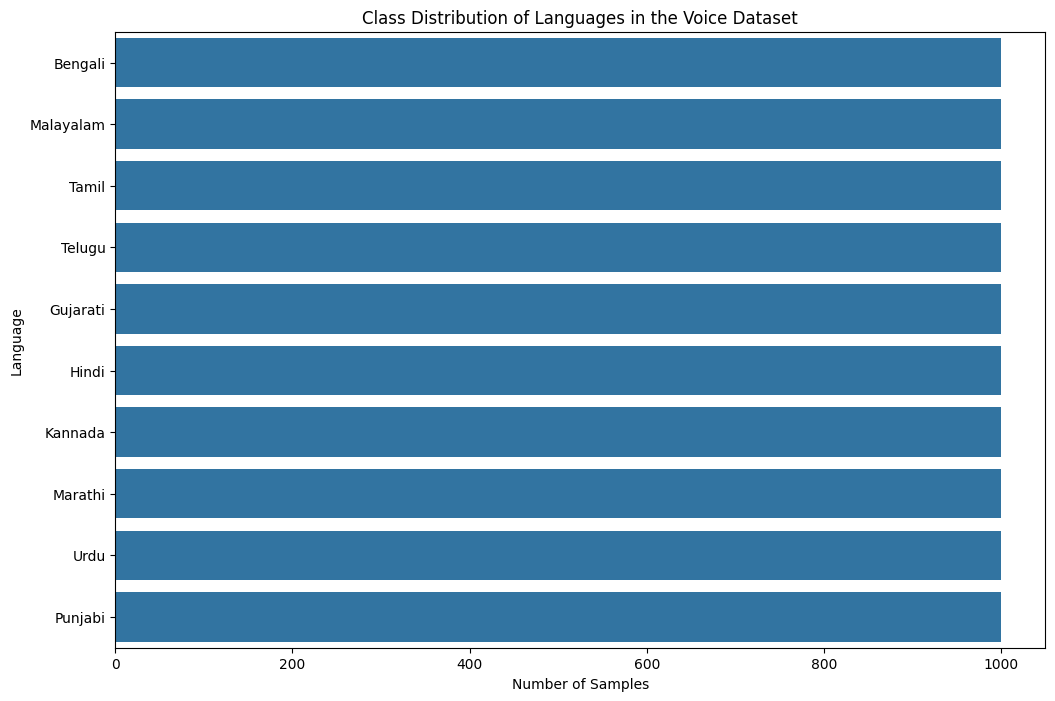

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have extracted files to 'mainDirectory'
mainDirectory = "/content/unzipped_files/Language Detection Dataset"

# Define the list of languages
languages = ['Bengali', 'Malayalam', 'Tamil', 'Telugu', 'Gujarati', 'Hindi', 'Kannada', 'Marathi', 'Urdu', 'Punjabi']

# Initialize lists to store labels and languages
label = []
lang = []

# Loop through each language directory and collect file names and corresponding language labels
for language in languages:
    for file in os.listdir(f'{mainDirectory}/{language}')[:1000]:
        label.append(file[:-4])
        lang.append(language)

# Create a DataFrame from the voice data to visualize the class distribution
dframe_voice = pd.DataFrame(data={'label': label, 'language': lang}, columns=['label', 'language'])

# Plot class distribution for voice data
plt.figure(figsize=(12, 8))
sns.countplot(y='language', data=dframe_voice, order=dframe_voice['language'].value_counts().index)
plt.title('Class Distribution of Languages in the Voice Dataset')
plt.xlabel('Number of Samples')
plt.ylabel('Language')
plt.savefig('class_distribution_voice.png', bbox_inches='tight')
plt.show()




In [ ]:
languages

['Bengali',
 'Malayalam',
 'Tamil',
 'Telugu',
 'Gujarati',
 'Hindi',
 'Kannada',
 'Marathi',
 'Urdu',
 'Punjabi']

In [ ]:
# Correctly formatted path declarations
bengali = f'/content/unzipped_files/Language_Detection_Dataset/Bengali'
malayalam = f'/content/unzipped_files/Language_Detection_Dataset/Malayalam'
tamil = f'/content/unzipped_files/Language_Detection_Dataset/Tamil'
telugu = f'/content/unzipped_files/Language_Detection_Dataset/Telugu'
gujarati = f'/content/unzipped_files/Language_Detection_Dataset/Gujarati'  # Corrected spelling of "Gujarati"
hindi = f'/content/unzipped_files/Language_Detection_Dataset/Hindi'
kannada = f'/content/unzipped_files/Language_Detection_Dataset/Kannada'
marathi = f'/content/unzipped_files/Language_Detection_Dataset/Marathi'
urdu = f'/content/unzipped_files/Language_Detection_Dataset/Urdu'
punjabi = f'/content/unzipped_files/Language_Detection_Dataset/Punjabi'


In [ ]:
def snr(audio_data):
    signal = np.array(audio_data.get_array_of_samples())
    signal_power = np.sum(signal**2) / len(signal)
    noise_power = np.sum((signal - np.mean(signal)) ** 2) / len(signal)
    snr = 10 * np.log10(signal_power / noise_power)
    return snr

In [ ]:
def has_distortion(audio_segment,threshold = 0.05) :
    audioFile = audio_segment.get_array_of_samples()
    audio = np.array(audioFile)

    rms = np.sqrt(np.mean(audio ** 2))

    if rms > threshold :
        return True
    return False

In [ ]:
from scipy.signal import welch

def uneven_frequency(sound,threshold = 0.1,sampling_rate=44100) :
    audio = sound.get_array_of_samples()

    f, psdArr = welch(audio, fs=sampling_rate, nperseg=2048)

    # maximum psd value of the array
    maxPsd = np.max(psdArr)

    if maxPsd > threshold :
        return False
    return True

In [ ]:
!pip install pydub

In [ ]:
from pydub import AudioSegment

def audio_quality(audio_file, threshold):
    sound = AudioSegment.from_file(audio_file)
    snrRatio = snr(sound)

    cond = [snrRatio < threshold, has_distortion(sound), uneven_frequency(sound)]

    for i in cond:
        if i is False:
            return False

    return True

In [ ]:
!pip install SpeechRecognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 27.0 MB/s eta 0:00:00


In [ ]:
def verify_language(audio_file, expLang):
    detectLang = detectLang(audio_file)

    if detectLang != expLang :
        return False

    return True

In [ ]:
def clean_data(files, expLang):
    cleanedFiles = []

    for file in files:
        if audio_quality(file) or verify_language(file, expLang):
            cleanedFiles.append(file)

    return cleanedFiles

In [ ]:
def normalize_volume(audio):
    return librosa.util.normalize(audio)

In [ ]:
def audio_segmentation(audio, segment_duration=5, sample_rate=22050):
    samplePerSegment = segment_duration * sample_rate
    segments = []
    for i in range(0,len(audio),samplePerSegment) :
        segments.append(audio[i:i+samplePerSegment])

    return segments

In [ ]:
import os
import glob
import librosa
import numpy as np
import pandas as pd

def Feature_extract(mainDirectory, languages, split=2000):
    data = []

    for language in languages:
        language_dir = os.path.join(mainDirectory, language)
        # Correct use of glob to find files
        audio_files = glob.glob(os.path.join(language_dir, '*.mp3'))

        print(f"Processing {len(audio_files)} files in {language_dir}")  # Debug: Check number of files

        for audio_file in audio_files[:split]:  # Limit to 'split' number of files
            try:
                # Using librosa to load audio files
                audio, sample_rate = librosa.load(audio_file, sr=None)  # Load with original sample rate
                audio = librosa.util.normalize(audio)
                mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
                mfccs_mean = np.mean(mfccs, axis=1)
                data.append((mfccs_mean, language))
            except Exception as e:
                print(f"Error processing {audio_file}: {e}")

    df = pd.DataFrame(data, columns=['Features', 'Class'])
    return df



In [ ]:
import os

# Specify the path to the problematic file
file_path = '/content/unzipped_files/Language_Detection_Dataset/Punjabi/19149.mp3'

# Check if the file exists
if os.path.exists(file_path):
    os.remove(file_path)  # Delete the file
    print(f"File {file_path} has been deleted.")
else:
    print(f"The file {file_path} does not exist.")


The file /content/unzipped_files/Language_Detection_Dataset/Punjabi/19149.mp3 does not exist.


In [ ]:
dframe = Feature_extract(mainDirectory, languages)
dframe.head()

Processing 27258 files in /content/unzipped_files/Language Detection Dataset/Bengali
Processing 24044 files in /content/unzipped_files/Language Detection Dataset/Malayalam


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=361
  warnings.warn(


Processing 24196 files in /content/unzipped_files/Language Detection Dataset/Tamil


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=2001
  warnings.warn(


Processing 23656 files in /content/unzipped_files/Language Detection Dataset/Telugu
Processing 26441 files in /content/unzipped_files/Language Detection Dataset/Gujarati
Processing 25462 files in /content/unzipped_files/Language Detection Dataset/Hindi
Processing 22208 files in /content/unzipped_files/Language Detection Dataset/Kannada
Processing 25379 files in /content/unzipped_files/Language Detection Dataset/Marathi
Processing 31960 files in /content/unzipped_files/Language Detection Dataset/Urdu
Processing 26229 files in /content/unzipped_files/Language Detection Dataset/Punjabi


<ipython-input-32-d23051ae406c>:20: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sample_rate = librosa.load(audio_file, sr=None)  # Load with original sample rate
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=633
  warnings.warn(


,Features,Class
0,"[-321.10956, 129.43198, -13.567303, 13.242972,...",Bengali
1,"[-325.08084, 168.03024, 24.184437, 20.542019, ...",Bengali
2,"[-263.04468, 115.92433, 5.539095, 25.81437, -1...",Bengali
3,"[-287.2676, 190.81726, 20.547958, 19.12345, 27...",Bengali
4,"[-315.73563, 160.63956, 27.717066, 25.478456, ...",Bengali


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
langLabel = {
    'Punjabi': 0,
    'Tamil': 1,
    'Hindi': 2,
    'Bengali': 3,
    'Telugu': 4,
    'Kannada': 5,
    'Gujarati': 6,
    'Urdu': 7,
    'Marathi': 8,
    'Malayalam': 9
}


In [ ]:
dframe['Class'] = dframe['Class'].apply(lambda x : langLabel[x])

In [ ]:
features = dframe.Features
X= np.array(features.tolist())
y= dframe.Class

In [ ]:
print("X shape:", X.shape if hasattr(X, 'shape') else "Not loaded")
print("y shape:", y.shape if hasattr(y, 'shape') else "Not loaded")


X shape: (20000, 40)
y shape: (20000,)


In [ ]:
!pip install joblib

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [ ]:

import joblib
best_model = None
best_accuracy = 0
for units in [1, 10, 100]:
    clf = MLPClassifier(hidden_layer_sizes=[units], random_state=1)
    clf.fit(X_train, y_train)
    print('for hidden layer= {}'.format(units))
    report = classification_report(y_test, clf.predict(X_test))
    print(report)

    # Store the best model
    current_accuracy = accuracy_score(y_test, clf.predict(X_test))
    if current_accuracy > best_accuracy:
        best_accuracy = current_accuracy
        best_model = clf

# Save the best model
if best_model:
    joblib.dump(best_model, 'trained_language_model.pkl')
    print("Best model saved with accuracy: {:.2f}".format(best_accuracy))

for hidden layer= 1
              precision    recall  f1-score   support

           0       0.40      0.01      0.01       382
           1       0.00      0.00      0.00       413
           2       0.00      0.00      0.00       397
           3       0.10      1.00      0.18       352
           4       0.00      0.00      0.00       413
           5       0.99      0.81      0.89       413
           6       0.00      0.00      0.00       412
           7       0.00      0.00      0.00       402
           8       0.00      0.00      0.00       387
           9       0.00      0.00      0.00       429

    accuracy                           0.17      4000
   macro avg       0.15      0.18      0.11      4000
weighted avg       0.15      0.17      0.11      4000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_

for hidden layer= 10
              precision    recall  f1-score   support

           0       0.25      0.01      0.01       382
           1       0.89      0.88      0.88       413
           2       0.96      0.94      0.95       397
           3       0.91      0.86      0.88       352
           4       0.86      0.77      0.81       413
           5       0.98      0.85      0.91       413
           6       0.49      0.90      0.63       412
           7       0.71      0.82      0.76       402
           8       0.67      0.85      0.75       387
           9       0.90      0.86      0.88       429

    accuracy                           0.78      4000
   macro avg       0.76      0.77      0.75      4000
weighted avg       0.76      0.78      0.75      4000

for hidden layer= 100
              precision    recall  f1-score   support

           0       0.45      0.19      0.26       382
           1       0.99      0.98      0.98       413
           2       0.99      0.97  

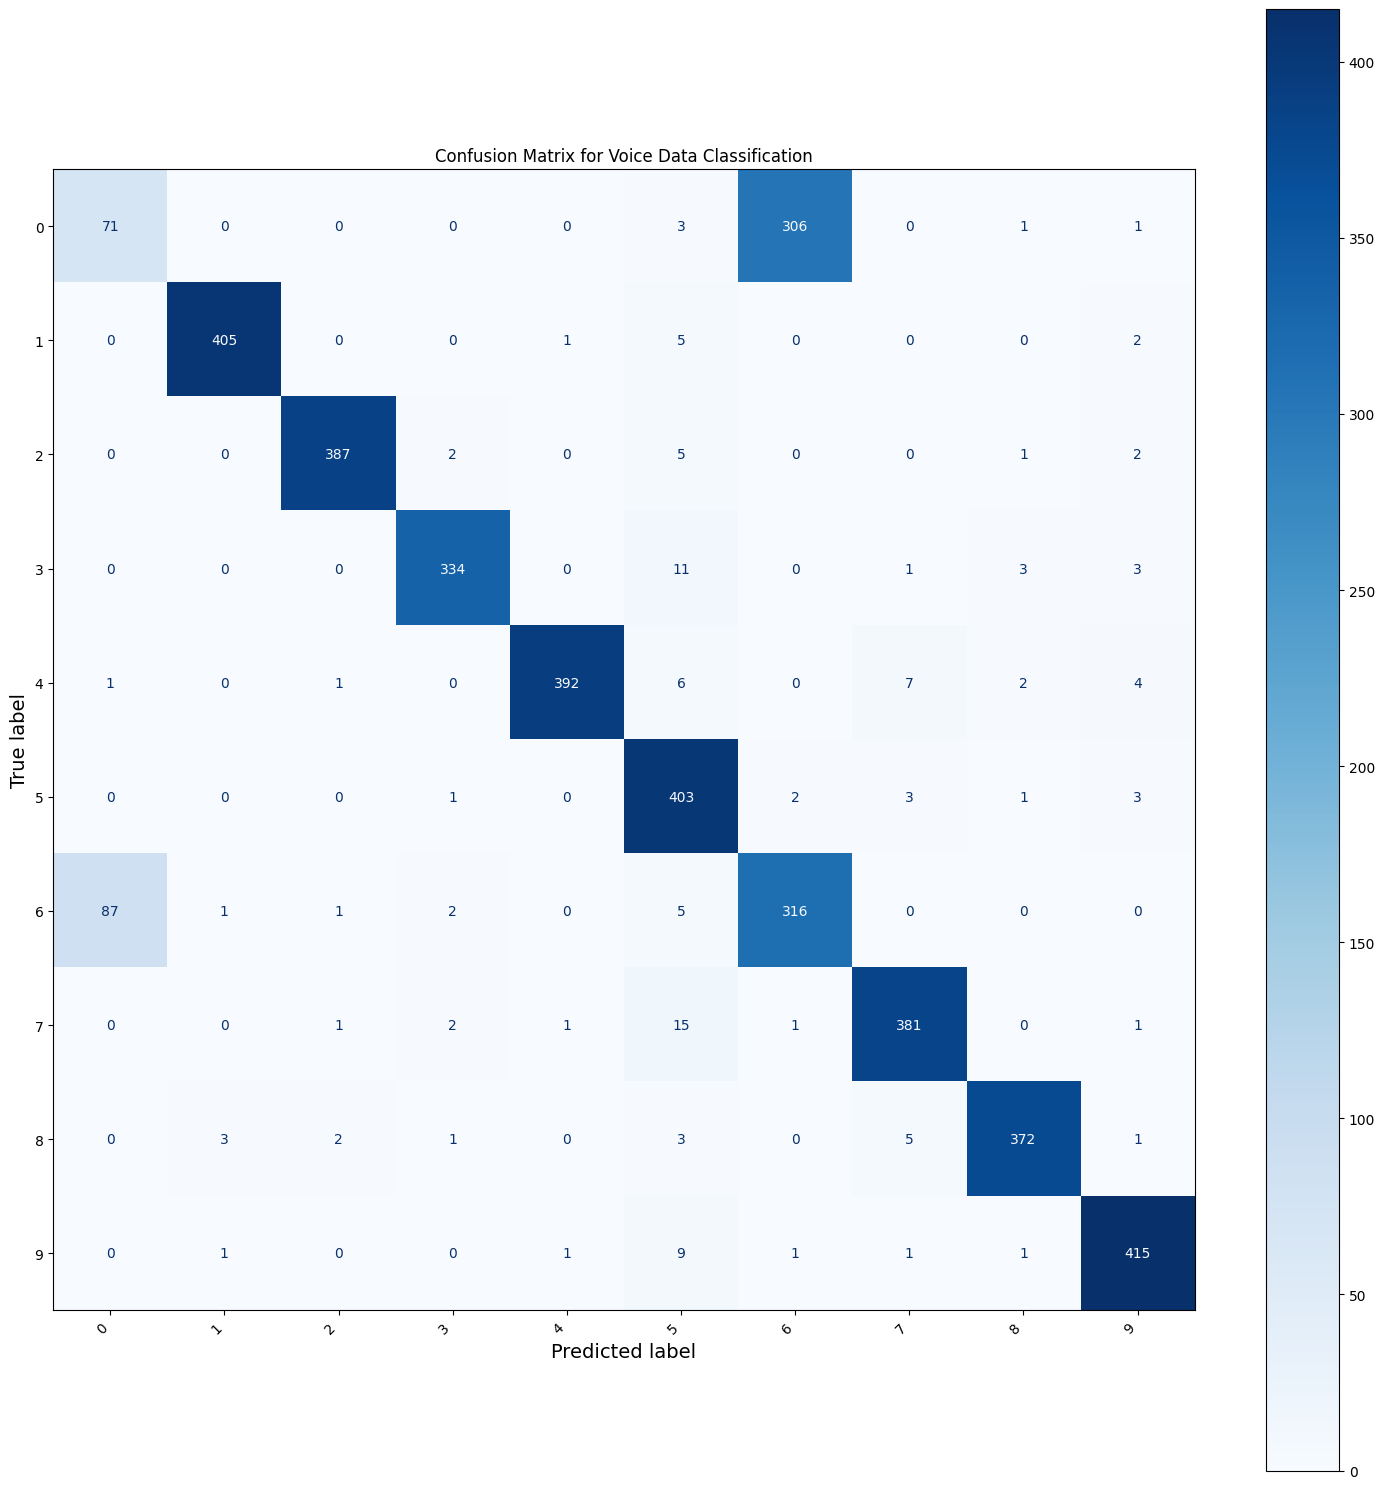

Classification Report for Voice Data Classification:

              precision    recall  f1-score   support

           0       0.45      0.19      0.26       382
           1       0.99      0.98      0.98       413
           2       0.99      0.97      0.98       397
           3       0.98      0.95      0.96       352
           4       0.99      0.95      0.97       413
           5       0.87      0.98      0.92       413
           6       0.50      0.77      0.61       412
           7       0.96      0.95      0.95       402
           8       0.98      0.96      0.97       387
           9       0.96      0.97      0.96       429

    accuracy                           0.87      4000
   macro avg       0.87      0.87      0.86      4000
weighted avg       0.87      0.87      0.86      4000



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import joblib

# Assuming your model is loaded, and X_test and y_test for voice data are ready
# Load the trained model
model = joblib.load('trained_language_model.pkl')

# Assuming X_test and y_test are already defined for the voice data
# Example: X_test, y_test = your_test_data, your_test_labels

# Predict using the trained model
y_pred = model.predict(X_test)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])  # Replace with your actual labels

# Plot the confusion matrix with improved alignment
fig, ax = plt.subplots(figsize=(15, 15))  # Increase figure size for better readability
disp.plot(ax=ax, cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix for Voice Data Classification')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels to 45 degrees and right-align them
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.xlabel('Predicted label', fontsize=14)
plt.ylabel('True label', fontsize=14)
plt.tight_layout()  # Adjust layout to make room for x-axis labels
plt.savefig('confusion_matrix_voice.png', bbox_inches='tight')
plt.show()

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report for Voice Data Classification:\n")
print(class_report)


In [ ]:
accuracy_score(y_test,clf.predict(X_test))

0.869

In [ ]:
import os
import numpy as np
import librosa
from glob import glob
import random

def extract_features(audio_file, augment=False):
    try:
        # Load audio file
        audio, sample_rate = librosa.load(audio_file, sr=None)
        if augment:
            # Data augmentation by adding noise
            noise_amt = 0.005 * np.random.normal(0, 1, len(audio))
            audio = audio + noise_amt

            # Data augmentation by shifting the sound wave
            shift_range = int(random.random() * 1000)
            audio = np.roll(audio, shift_range)

        # Normalize audio
        audio = librosa.util.normalize(audio)

        # Extract MFCC features
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccs_mean = np.mean(mfccs, axis=1)

        return mfccs_mean.reshape(1, -1)  # Reshape for single sample prediction
    except Exception as e:
        print(f"Error processing {audio_file}: {e}")
        return None


In [ ]:
# Load the trained model
import joblib

model = joblib.load('trained_language_model.pkl')

In [ ]:
# Mapping from numeric labels to language names
lang_label_dict = {
    0: 'Punjabi', 1: 'Tamil', 2: 'Hindi', 3: 'Bengali',
    4: 'Telugu', 5: 'Kannada', 6: 'Gujarati', 7: 'Urdu',
    8: 'Marathi', 9: 'Malayalam'
}


In [ ]:
import librosa
import numpy as np
import joblib

def extract_features(audio_file):
    # Load the audio file
    audio, sample_rate = librosa.load(audio_file, sr=None)
    audio = librosa.util.normalize(audio)

    # Extract MFCC features
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_mean = np.mean(mfccs, axis=1)

    # Reshape features for the model input
    features = mfccs_mean.reshape(1, -1)
    return features

def predict_language(audio_file, model, label_dict):
    # Extract features
    features = extract_features(audio_file)

    # Use the loaded model to predict the language
    prediction = model.predict(features)

    # Convert numeric prediction back to language name
    predicted_language = label_dict.get(prediction[0], "Unknown Language")

    return predicted_language

# Load the trained model
model = joblib.load('trained_language_model.pkl')

# Example usage
audio_file_path = '/content/unzipped_files/Language Detection Dataset/Kannada/10000.mp3'  # Change this path to your audio file
predicted_language = predict_language(audio_file_path, model, lang_label_dict)
print("Predicted Language:", predicted_language)


Predicted Language: Kannada


Using Real-Time data

In [ ]:
import librosa
import numpy as np
import joblib

def extract_features(audio_file):
    # Load the audio file
    audio, sample_rate = librosa.load(audio_file, sr=None)
    audio = librosa.util.normalize(audio)

    # Extract MFCC features
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_mean = np.mean(mfccs, axis=1)

    # Reshape features for the model input
    features = mfccs_mean.reshape(1, -1)
    return features

def predict_language(audio_file, model, label_dict):
    # Extract features
    features = extract_features(audio_file)

    # Use the loaded model to predict the language
    prediction = model.predict(features)

    # Convert numeric prediction back to language name
    predicted_language = label_dict.get(prediction[0], "Unknown Language")

    return predicted_language

# Load the trained model
model = joblib.load('trained_language_model.pkl')

# Example usage
audio_file_path = '/content/hin.mp3'  # Change this path to your audio file
predicted_language = predict_language(audio_file_path, model, lang_label_dict)
print("Predicted Language:", predicted_language)


Predicted Language: Hindi


In [ ]:

import librosa
import numpy as np
import joblib

def extract_features(audio_file):
    # Load the audio file
    audio, sample_rate = librosa.load(audio_file, sr=None)
    audio = librosa.util.normalize(audio)

    # Extract MFCC features
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_mean = np.mean(mfccs, axis=1)

    # Reshape features for the model input
    features = mfccs_mean.reshape(1, -1)
    return features

def predict_language(audio_file, model, label_dict):
    # Extract features
    features = extract_features(audio_file)

    # Use the loaded model to predict the language
    prediction = model.predict(features)

    # Convert numeric prediction back to language name
    predicted_language = label_dict.get(prediction[0], "Unknown Language")

    return predicted_language

# Load the trained model
model = joblib.load('trained_language_model.pkl')

# Example usage
audio_file_path = '/content/kan.mp3'  # Change this path to your audio file
predicted_language = predict_language(audio_file_path, model, lang_label_dict)
print("Predicted Language:", predicted_language)


Predicted Language: Kannada
